In [38]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score,f1_score

In [13]:
# read the downloaded data
news = pd.read_csv('C:\\Users\\...\\Downloads\\news.csv')

In [16]:
#shape and head
news.shape
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [17]:
#get the labels
labels = news.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [18]:
# split into training and test dataset
x_train, x_test,y_train,y_test = train_test_split(news['text'], news['label'], test_size=0.2, random_state=7)

In [19]:
# remove higher document frequency English stop words and then transform
news_vector = TfidfVectorizer(stop_words='english', max_df=0.7)
news_train = news_vector.fit_transform(x_train) # fitting and then transforming the train set
news_test = news_vector.transform(x_test)# only transforming using the scaling generated by fit method
        

In [43]:
# passiveaggressiveclassifier remains passive for correct classification, but aggressive in the event of mistake.
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(news_train,y_train) # fit the classifier on our train data
y_pred = classifier.predict(news_test) #predict the test set
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score is {acc*100}")

Accuracy score is 92.73875295974744


In [ ]:
# our classifier gave a pretty accurate classification with an accuracy of 92.74%.

In [47]:
# precision score- predicted positive rate
#The F1 score limits both the false positives and false negatives as much as possible. 
prec= precision_score(y_test,y_pred,pos_label='REAL')
f1= f1_score(y_test,y_pred,pos_label='REAL')
print(f'Precision is {prec*100} and F1 score is {f1*100}')

Precision is 92.41706161137441 and F1 score is 92.70998415213947


In [33]:
# confusion matrix to get info on number of positives and negatives
cm=confusion_matrix(y_test,y_pred,labels= classifier.classes_)
cm

array([[589,  49],
       [ 44, 585]], dtype=int64)

In [34]:
classifier.classes_

array(['FAKE', 'REAL'], dtype='<U4')

In [ ]:
# so we got 589 true negatives, 44 false negatives, 49 false positives and 585 true positives.

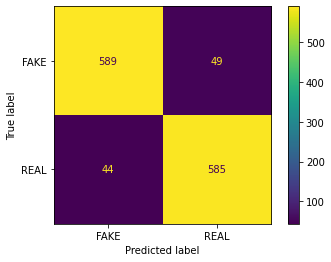

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()